<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;">
<img border="0" src="https://www.polytechnique.edu/sites/all/institutionnel/institutpolytechniqueparis_logohorizontal.png" width="90%"> </td>
     <td style="background-color:transparent;">
<img border="0" src="" width="60%"> </td>
  </tr>
</table> 
</div>
<center><h1>Arabic News Category Prediction Challenge (ANCP)</h1></center>
<br/>
<center>Ahmad CHAMMA, Hadi ABDINE, Youssef FARHAT</center>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import datetime
import dateutil.parser as dparser
import nltk
from nltk.corpus import stopwords
import unicodedata as ud
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('data/Crowling_useful.csv')

In [3]:
df.head(5)

,Id,Title,Date,Desc,Image,Type
0,1300008,روما 2: المواجهة الأولى في المبارزة الثلاثية,السبت 10 آذار 2018 - 06:54,\n\n\tقبل انعقاد مؤتمر «روما 2» منتصف الأسبوع ...,http://www.lebanonfiles.com/files/images/10-03...,أخبار محليّة
1,1300003,"باسيل في مواجهة مع ""مثلَّث القلق"" المتنامي",السبت 10 آذار 2018 - 06:51,\n\n\tيدرك الوزير جبران باسيل أنّ كتلة «التغيي...,http://www.lebanonfiles.com/files/images/10-03...,أخبار محليّة
2,1300001,حزب الله - التيار الوطني الحر: هذا هو مصير الت...,السبت 10 آذار 2018 - 06:49,\n\n\tيعكس العدد الكبير والقياسي للمرشّحين الى...,http://www.lebanonfiles.com/files/images/10-03...,أخبار محليّة
3,1300018,الدائرة الثالثة في الجنوب: مساع للمنافسين لاحت...,السبت 10 آذار 2018 - 07:19,\n\n\t \n\n\tتعيش الدائرة الثالثة في الجنوب اج...,http://www.lebanonfiles.com/files/images/10-03...,أخبار محليّة
4,1300016,حلف ثلاثي في الشوف وبعبدا يطيّر الحساب مع التي...,السبت 10 آذار 2018 - 07:18,\n\n\n\tتؤكد المعطيات الجديدة المتصلة بمسار ال...,http://www.lebanonfiles.com/files/images/10-03...,أخبار محليّة


### Convert the arabic date to datetime format

In [4]:
def convert_to_date(x):
    dicta =  {"كانون الثاني": "january" ,"شباط": "february", "أيار": "may",  "نيسان": "April",
         "آذار": "march", "حزيران": "june", "تموز": "july", "آب": "august", "أيلول": "september",
         "تشرين الأول": "october", "تشرين الثاني": "november", "كانون الأول": "december",
         "الاثنين": "monday", "الثلاثاء": "tuesday", "الأربعاء": "wednesday", "الخميس": "thursday", "الجمعة": "friday",
         "السبت": "saturday", "الأحد": "sunday"}
    if len(x)>0:
        res = ' '.join([dicta.get(i, i) for i in x.split()])
        res2 = dparser.parse(res, fuzzy=True)
    return res2

In [5]:
df['date_proc'] = df['Date'].apply(convert_to_date)

### Clean the "Desc" column (remove \t and other symbols)

In [6]:
stps_arabic = set(stopwords.words('arabic'))
arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def clean_txt(sent):
    """
        text: a string
        
        return: modified initial string
    """    
    text = sent.strip()
    text = re.sub('[\n\r\t\xa0]', ' ', text)
    text = re.sub(arabic_diacritics, '', text)
    text = ''.join(c for c in text if not ud.category(c).startswith('P') and not c.isdigit())
    res = re.sub(' +', ' ', text)
    return [w for w in text.split() if w not in stps_arabic]

In [7]:
df['title_proc'] = df['Title'].apply(clean_txt)
df['desc_proc'] = df['Desc'].apply(clean_txt)

In [8]:
df.head(5)

,Id,Title,Date,Desc,Image,Type,date_proc,title_proc,desc_proc
0,1300008,روما 2: المواجهة الأولى في المبارزة الثلاثية,السبت 10 آذار 2018 - 06:54,\n\n\tقبل انعقاد مؤتمر «روما 2» منتصف الأسبوع ...,http://www.lebanonfiles.com/files/images/10-03...,أخبار محليّة,2018-03-10 06:54:00,"[روما, المواجهة, الأولى, المبارزة, الثلاثية]","[قبل, انعقاد, مؤتمر, روما, منتصف, الأسبوع, الم..."
1,1300003,"باسيل في مواجهة مع ""مثلَّث القلق"" المتنامي",السبت 10 آذار 2018 - 06:51,\n\n\tيدرك الوزير جبران باسيل أنّ كتلة «التغيي...,http://www.lebanonfiles.com/files/images/10-03...,أخبار محليّة,2018-03-10 06:51:00,"[باسيل, مواجهة, مثلث, القلق, المتنامي]","[يدرك, الوزير, جبران, باسيل, كتلة, التغيير, وا..."
2,1300001,حزب الله - التيار الوطني الحر: هذا هو مصير الت...,السبت 10 آذار 2018 - 06:49,\n\n\tيعكس العدد الكبير والقياسي للمرشّحين الى...,http://www.lebanonfiles.com/files/images/10-03...,أخبار محليّة,2018-03-10 06:49:00,"[حزب, الله, التيار, الوطني, الحر, مصير, التفاهم]","[يعكس, العدد, الكبير, والقياسي, للمرشحين, الى,..."
3,1300018,الدائرة الثالثة في الجنوب: مساع للمنافسين لاحت...,السبت 10 آذار 2018 - 07:19,\n\n\t \n\n\tتعيش الدائرة الثالثة في الجنوب اج...,http://www.lebanonfiles.com/files/images/10-03...,أخبار محليّة,2018-03-10 07:19:00,"[الدائرة, الثالثة, الجنوب, مساع, للمنافسين, لا...","[تعيش, الدائرة, الثالثة, الجنوب, اجواء, ارتياح..."
4,1300016,حلف ثلاثي في الشوف وبعبدا يطيّر الحساب مع التي...,السبت 10 آذار 2018 - 07:18,\n\n\n\tتؤكد المعطيات الجديدة المتصلة بمسار ال...,http://www.lebanonfiles.com/files/images/10-03...,أخبار محليّة,2018-03-10 07:18:00,"[حلف, ثلاثي, الشوف, وبعبدا, يطير, الحساب, التي...","[تؤكد, المعطيات, الجديدة, المتصلة, بمسار, التح..."


In [9]:
df.shape

(20626, 9)

In [10]:
df.describe()

,Id
count,2.062600e+04
mean,1.325098e+06
std,1.459965e+04
min,1.300001e+06
25%,1.312391e+06
50%,1.325154e+06
75%,1.337950e+06
max,1.349991e+06


In [11]:
df.dtypes

Id                     int64
Title                 object
Date                  object
Desc                  object
Image                 object
Type                  object
date_proc     datetime64[ns]
title_proc            object
desc_proc             object
dtype: object

In [12]:
#df.nunique()

TypeError: ("unhashable type: 'list'", 'occurred at index title_proc')

### Convert the target class from text to number

In [22]:
class2index = dict(zip(useful_categories, range(len(useful_categories))))

In [64]:
useful['Type'] = useful['Type'].map(class2index)

C:\Users\Hadi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


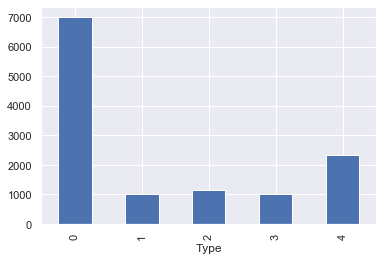

In [65]:
useful.groupby('Type').size().plot(kind='bar')

#### As we can see the data is unbalanced so as scorer we use the F1 Score as scorer dor our challenge

### Naive fill for the "Desc" Column

In [53]:
useful.loc[useful['Desc']=='\n', 'Desc'] = useful['Title']

C:\Users\Hadi\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Remove stop words (list os stop words from MIT github)

In [66]:
stop_arab_words = ['،', 'ء', 'ءَ', 'آ', 'آب', 'آذار', 'آض', 'آل', 'آمينَ', 'آناء', 'آنفا', 'آه', 'آهاً', 'آهٍ', 'آهِ', 'أ', 'أبدا', 'أبريل', 'أبو', 'أبٌ', 'أجل', 'أجمع', 'أحد', 'أخبر', 'أخذ', 'أخو', 'أخٌ', 'أربع', 'أربعاء', 'أربعة', 'أربعمئة', 'أربعمائة', 'أرى', 'أسكن', 'أصبح', 'أصلا', 'أضحى', 'أطعم', 'أعطى', 'أعلم', 'أغسطس', 'أفريل', 'أفعل به', 'أفٍّ', 'أقبل', 'أكتوبر', 'أل', 'ألا', 'ألف', 'ألفى', 'أم', 'أما', 'أمام', 'أمامك', 'أمامكَ', 'أمد', 'أمس', 'أمسى', 'أمّا', 'أن', 'أنا', 'أنبأ', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'أنتِ', 'أنشأ', 'أنه', 'أنًّ', 'أنّى', 'أهلا', 'أو', 'أوت', 'أوشك', 'أول', 'أولئك', 'أولاء', 'أولالك', 'أوّهْ', 'أى', 'أي', 'أيا', 'أيار', 'أيضا', 'أيلول', 'أين', 'أيّ', 'أيّان', 'أُفٍّ', 'ؤ', 'إحدى', 'إذ', 'إذا', 'إذاً', 'إذما', 'إذن', 'إزاء', 'إلى', 'إلي', 'إليكم', 'إليكما', 'إليكنّ', 'إليكَ', 'إلَيْكَ', 'إلّا', 'إمّا', 'إن', 'إنَّ', 'إى', 'إياك', 'إياكم', 'إياكما', 'إياكن', 'إيانا', 'إياه', 'إياها', 'إياهم', 'إياهما', 'إياهن', 'إياي', 'إيهٍ', 'ئ', 'ا', 'ا?', 'ا?ى', 'االا', 'االتى', 'ابتدأ', 'ابين', 'اتخذ', 'اثر', 'اثنا', 'اثنان', 'اثني', 'اثنين', 'اجل', 'احد', 'اخرى', 'اخلولق', 'اذا', 'اربعة', 'اربعون', 'اربعين', 'ارتدّ', 'استحال', 'اصبح', 'اضحى', 'اطار', 'اعادة', 'اعلنت', 'اف', 'اكثر', 'اكد', 'الآن', 'الألاء', 'الألى', 'الا', 'الاخيرة', 'الان', 'الاول', 'الاولى', 'التى', 'التي', 'الثاني', 'الثانية', 'الحالي', 'الذاتي', 'الذى', 'الذي', 'الذين', 'السابق', 'الف', 'اللاتي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'الماضي', 'المقبل', 'الوقت', 'الى', 'الي', 'اليه', 'اليها', 'اليوم', 'اما', 'امام', 'امس', 'امسى', 'ان', 'انبرى', 'انقلب', 'انه', 'انها', 'او', 'اول', 'اي', 'ايار', 'ايام', 'ايضا', 'ب', 'بؤسا', 'بإن', 'بئس', 'باء', 'بات', 'باسم', 'بان', 'بخٍ', 'بد', 'بدلا', 'برس', 'بسبب', 'بسّ', 'بشكل', 'بضع', 'بطآن', 'بعد', 'بعدا', 'بعض', 'بغتة', 'بل', 'بلى', 'بن', 'به', 'بها', 'بهذا', 'بيد', 'بين', 'بَسْ', 'بَلْهَ', 'ة', 'ت', 'تاء', 'تارة', 'تاسع', 'تانِ', 'تانِك', 'تبدّل', 'تجاه', 'تحت', 'تحوّل', 'تخذ', 'ترك', 'تسع', 'تسعة', 'تسعمئة', 'تسعمائة', 'تسعون', 'تسعين', 'تشرين', 'تعسا', 'تعلَّم', 'تفعلان', 'تفعلون', 'تفعلين', 'تكون', 'تلقاء', 'تلك', 'تم', 'تموز', 'تينك', 'تَيْنِ', 'تِه', 'تِي', 'ث', 'ثاء', 'ثالث', 'ثامن', 'ثان', 'ثاني', 'ثلاث', 'ثلاثاء', 'ثلاثة', 'ثلاثمئة', 'ثلاثمائة', 'ثلاثون', 'ثلاثين', 'ثم', 'ثمان', 'ثمانمئة', 'ثمانون', 'ثماني', 'ثمانية', 'ثمانين', 'ثمنمئة', 'ثمَّ', 'ثمّ', 'ثمّة', 'ج', 'جانفي', 'جدا', 'جعل', 'جلل', 'جمعة', 'جميع', 'جنيه', 'جوان', 'جويلية', 'جير', 'جيم', 'ح', 'حاء', 'حادي', 'حار', 'حاشا', 'حاليا', 'حاي', 'حبذا', 'حبيب', 'حتى', 'حجا', 'حدَث', 'حرى', 'حزيران', 'حسب', 'حقا', 'حمدا', 'حمو', 'حمٌ', 'حوالى', 'حول', 'حيث', 'حيثما', 'حين', 'حيَّ', 'حَذارِ', 'خ', 'خاء', 'خاصة', 'خال', 'خامس', 'خبَّر', 'خلا', 'خلافا', 'خلال', 'خلف', 'خمس', 'خمسة', 'خمسمئة', 'خمسمائة', 'خمسون', 'خمسين', 'خميس', 'د', 'دال', 'درهم', 'درى', 'دواليك', 'دولار', 'دون', 'دونك', 'ديسمبر', 'دينار', 'ذ', 'ذا', 'ذات', 'ذاك', 'ذال', 'ذانك', 'ذانِ', 'ذلك', 'ذهب', 'ذو', 'ذيت', 'ذينك', 'ذَيْنِ', 'ذِه', 'ذِي', 'ر', 'رأى', 'راء', 'رابع', 'راح', 'رجع', 'رزق', 'رويدك', 'ريال', 'ريث', 'رُبَّ', 'ز', 'زاي', 'زعم', 'زود', 'زيارة', 'س', 'ساء', 'سابع', 'سادس', 'سبت', 'سبتمبر', 'سبحان', 'سبع', 'سبعة', 'سبعمئة', 'سبعمائة', 'سبعون', 'سبعين', 'ست', 'ستة', 'ستكون', 'ستمئة', 'ستمائة', 'ستون', 'ستين', 'سحقا', 'سرا', 'سرعان', 'سقى', 'سمعا', 'سنة', 'سنتيم', 'سنوات', 'سوف', 'سوى', 'سين', 'ش', 'شباط', 'شبه', 'شتانَ', 'شخصا', 'شرع', 'شمال', 'شيكل', 'شين', 'شَتَّانَ', 'ص', 'صاد', 'صار', 'صباح', 'صبر', 'صبرا', 'صدقا', 'صراحة', 'صفر', 'صهٍ', 'صهْ', 'ض', 'ضاد', 'ضحوة', 'ضد', 'ضمن', 'ط', 'طاء', 'طاق', 'طالما', 'طرا', 'طفق', 'طَق', 'ظ', 'ظاء', 'ظل', 'ظلّ', 'ظنَّ', 'ع', 'عاد', 'عاشر', 'عام', 'عاما', 'عامة', 'عجبا', 'عدا', 'عدة', 'عدد', 'عدم', 'عدَّ', 'عسى', 'عشر', 'عشرة', 'عشرون', 'عشرين', 'عل', 'علق', 'علم', 'على', 'علي', 'عليك', 'عليه', 'عليها', 'علًّ', 'عن', 'عند', 'عندما', 'عنه', 'عنها', 'عوض', 'عيانا', 'عين', 'عَدَسْ', 'غ', 'غادر', 'غالبا', 'غدا', 'غداة', 'غير', 'غين', 'ـ', 'ف', 'فإن', 'فاء', 'فان', 'فانه', 'فبراير', 'فرادى', 'فضلا', 'فقد', 'فقط', 'فكان', 'فلان', 'فلس', 'فهو', 'فو', 'فوق', 'فى', 'في', 'فيفري', 'فيه', 'فيها', 'ق', 'قاطبة', 'قاف', 'قال', 'قام', 'قبل', 'قد', 'قرش', 'قطّ', 'قلما', 'قوة', 'ك', 'كأن', 'كأنّ', 'كأيّ', 'كأيّن', 'كاد', 'كاف', 'كان', 'كانت', 'كانون', 'كثيرا', 'كذا', 'كذلك', 'كرب', 'كسا', 'كل', 'كلتا', 'كلم', 'كلَّا', 'كلّما', 'كم', 'كما', 'كن', 'كى', 'كيت', 'كيف', 'كيفما', 'كِخ', 'ل', 'لأن', 'لا', 'لا سيما', 'لات', 'لازال', 'لاسيما', 'لام', 'لايزال', 'لبيك', 'لدن', 'لدى', 'لدي', 'لذلك', 'لعل', 'لعلَّ', 'لعمر', 'لقاء', 'لكن', 'لكنه', 'لكنَّ', 'للامم', 'لم', 'لما', 'لمّا', 'لن', 'له', 'لها', 'لهذا', 'لهم', 'لو', 'لوكالة', 'لولا', 'لوما', 'ليت', 'ليرة', 'ليس', 'ليسب', 'م', 'مئة', 'مئتان', 'ما', 'ما أفعله', 'ما انفك', 'ما برح', 'مائة', 'ماانفك', 'مابرح', 'مادام', 'ماذا', 'مارس', 'مازال', 'مافتئ', 'ماي', 'مايزال', 'مايو', 'متى', 'مثل', 'مذ', 'مرّة', 'مساء', 'مع', 'معاذ', 'معه', 'مقابل', 'مكانكم', 'مكانكما', 'مكانكنّ', 'مكانَك', 'مليار', 'مليم', 'مليون', 'مما', 'من', 'منذ', 'منه', 'منها', 'مه', 'مهما', 'ميم', 'ن', 'نا', 'نبَّا', 'نحن', 'نحو', 'نعم', 'نفس', 'نفسه', 'نهاية', 'نوفمبر', 'نون', 'نيسان', 'نيف', 'نَخْ', 'نَّ', 'ه', 'هؤلاء', 'ها', 'هاء', 'هاكَ', 'هبّ', 'هذا', 'هذه', 'هل', 'هللة', 'هلم', 'هلّا', 'هم', 'هما', 'همزة', 'هن', 'هنا', 'هناك', 'هنالك', 'هو', 'هي', 'هيا', 'هيهات', 'هيّا', 'هَؤلاء', 'هَاتانِ', 'هَاتَيْنِ', 'هَاتِه', 'هَاتِي', 'هَجْ', 'هَذا', 'هَذانِ', 'هَذَيْنِ', 'هَذِه', 'هَذِي', 'هَيْهات', 'و', 'و6', 'وأبو', 'وأن', 'وا', 'واحد', 'واضاف', 'واضافت', 'واكد', 'والتي', 'والذي', 'وان', 'واهاً', 'واو', 'واوضح', 'وبين', 'وثي', 'وجد', 'وراءَك', 'ورد', 'وعلى', 'وفي', 'وقال', 'وقالت', 'وقد', 'وقف', 'وكان', 'وكانت', 'ولا', 'ولايزال', 'ولكن', 'ولم', 'وله', 'وليس', 'ومع', 'ومن', 'وهب', 'وهذا', 'وهو', 'وهي', 'وَيْ', 'وُشْكَانَ', 'ى', 'ي', 'ياء', 'يفعلان', 'يفعلون', 'يكون', 'يلي', 'يمكن', 'يمين', 'ين', 'يناير', 'يوان', 'يورو', 'يوليو', 'يوم', 'يونيو', 'ّأيّان']
